In [80]:
import pickle
import os

import numpy as np

import networkx as nx

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../../src/")

In [81]:
with open("../../data/input/preprocessed/cache_system=london_layers=1-2_theta=0.68_rep=1.pkl", "rb") as _fh:
    cache = pickle.load(_fh)

components = sorted([c for c in nx.connected_components(cache.remnants[0])], key=len, reverse=True)

In [82]:
def get_center_of_mass(vectors):
    return np.mean(vectors, axis=0)

In [83]:
components_vectors = [
    [cache.embeddings[0][node] for node in component]
    for component in components
]

In [84]:
centers = [get_center_of_mass(vectors) for vectors in components_vectors]
pca = PCA(n_components=2)
centers = pca.fit_transform(centers)

Text(0.5, 1.0, 'Projection of Component Centers')

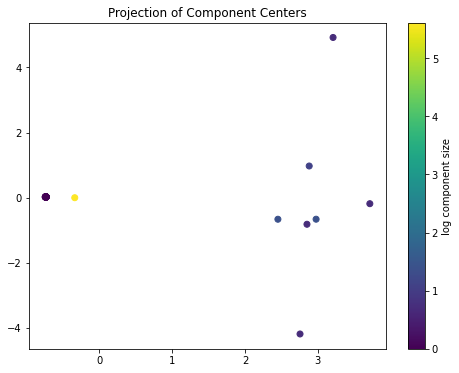

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(*list(zip(*centers)), c=[np.log(len(c)) for c in components])
plt.colorbar(label="log component size")
plt.title("Projection of Component Centers")

Text(0.5, 1.0, 'Coordinate Frequencies of Projection of Component Centers')

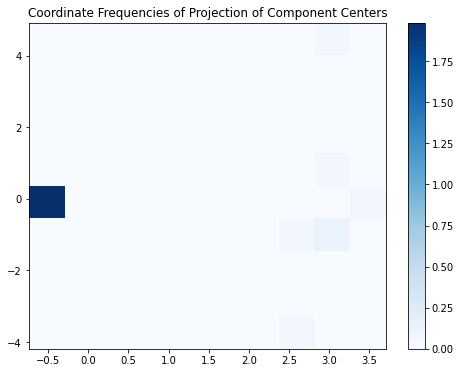

In [86]:
plt.figure(figsize=(8,6))
plt.hist2d(*list(zip(*centers)), density=True, cmap="Blues")
plt.colorbar()
plt.title("Coordinate Frequencies of Projection of Component Centers")

In [87]:
def align_centers(U, V):
    ubar = get_center_of_mass(U)
    vbar = get_center_of_mass(V)

    delta = ubar - vbar

    Vprime = [v + delta for v in V]

    return Vprime

In [92]:
shifted_components_vectors = [components_vectors[0]]
for V in components_vectors[1:]:
    shifted_components_vectors.append(align_centers(components_vectors[0], V))

In [93]:
shifted_centers = [get_center_of_mass(vectors) for vectors in shifted_components_vectors]
shifted_centers = pca.fit_transform(shifted_centers)

Text(0.5, 1.0, 'Projection of Shifted Component Centers')

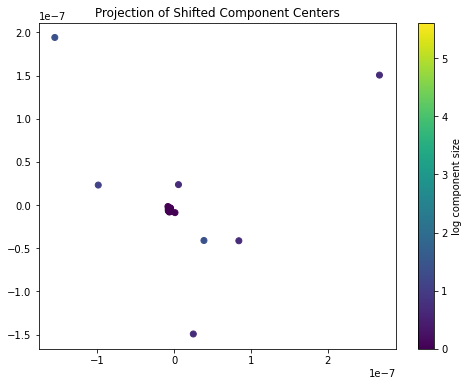

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(*list(zip(*shifted_centers)), c=[np.log(len(c)) for c in components])
plt.colorbar(label="log component size")
plt.title("Projection of Shifted Component Centers")

Text(0.5, 1.0, 'Coordinate Frequencies of Projection of Shifted Component Centers')

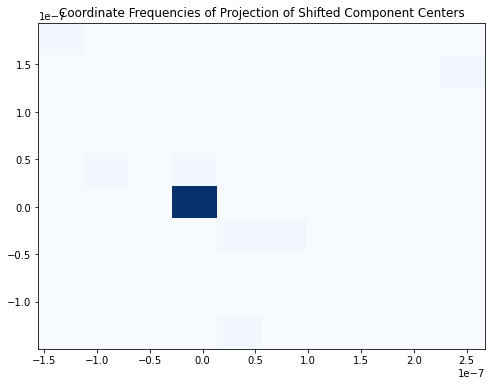

In [96]:
plt.figure(figsize=(8,6))
plt.hist2d(*list(zip(*shifted_centers)), density=True, cmap="Blues")
# plt.colorbar()
plt.title("Coordinate Frequencies of Projection of Shifted Component Centers")